<a href="https://colab.research.google.com/github/Itallo0708/Computational-Mathematics/blob/main/notebooks/Atividade_2_1_Zero_reais_de_fun%C3%A7%C3%B5es_reais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 2.1 - Zero reais de funções reais
Importando bibliotecas utilizadas no notebook

In [ ]:
import time
import math

# Questão A)
Implementação e análise comparativa de métodos numéricos para busca de raízes, reproduzindo os exemplos do livro texto.

#1) Método da Bisseção
# 1.1) Explicação Teórica
O **Método da Bissecção** é um algoritmo iterativo para encontrar zeros reais de funções. Ele parte da premissa de que temos uma função $f(x)$ contínua em um intervalo $[a, b]$ e que os valores da função nas extremidades deste intervalo possuem sinais opostos, ou seja, $f(a) \cdot f(b) < 0$.

Pelo Teorema de Bolzano, essa condição garante a existência de pelo menos uma raiz real no intervalo. O objetivo do método é reduzir a amplitude deste intervalo sucessivamente até que ela seja menor que uma precisão $\epsilon$ requerida (ou seja, $b - a < \epsilon$).

### Funcionamento Geométrico
O processo consiste em dividir o intervalo ao meio repetidamente. A cada passo $k$, calculamos o ponto médio $x_k$:
$$x_k = \frac{a_k + b_k}{2}$$

Em seguida, analisamos o sinal da função nesse ponto médio para decidir qual subintervalo contém a raiz:

1. Se $f(a_k) \cdot f(x_k) < 0$, a raiz está no subintervalo esquerdo. Fazemos $b_{k+1} = x_k$ e mantemos $a_{k+1} = a_k$.
2. Se $f(a_k) \cdot f(x_k) > 0$, a raiz está no subintervalo direito. Fazemos $a_{k+1} = x_k$ e mantemos $b_{k+1} = b_k$.
3. Se $f(x_k) = 0$, encontramos a raiz exata.










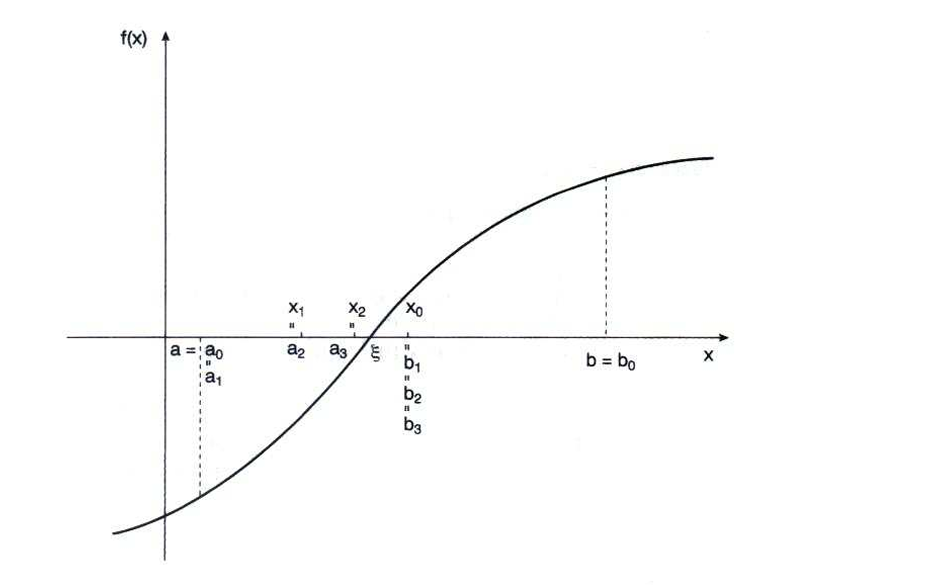

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/sample_data/bissecao.png'))

### Convergência
O método gera uma sequência de intervalos aninhados que converge obrigatoriamente para a raiz, desde que as hipóteses iniciais sejam satisfeitas. Embora a convergência seja garantida, ela é considerada lenta quando comparada a outros métodos, pois o erro é reduzido apenas pela metade a cada iteração.

A estimativa do número de iterações $k$ necessárias para atingir uma precisão $\epsilon$ pode ser calculada pela fórmula:
$$k > \frac{\log(b_0 - a_0) - \log(\epsilon)}{\log(2)}$$


# 1.2) Implementação
Faremos a execução seguindo estritamente a implementação do livro, com a adição de contadores de tempo exigidos no comando da questão.

In [ ]:
def metodo_bissecao(f,a,b, epsilon):
  # 1. dados iniciais,função, intervalo [a, b] e epsilon

  inicio = time.perf_counter() # inicia marcador de tempo

  if ( b - a) < epsilon:
    fim = time.perf_counter()
    return a, f(a), (b-a), 0, (fim - inicio), 0
    # 2. escolhemos a como raiz pois a diferença do intervalo é pequena o suficiente

  k = 1
  # 3.

  M = f(a)
  # 4. Avaliação da função

  while True:
    x = (a+b)/2
    # 5. valor médio do intervalo

    if M * f(x) > 0:
      a = x
      # 6. teste do sinal

    else:
      b = x
      # 7. b tem o mesmo sinal que o x

    if b - a < epsilon:
      fim = time.perf_counter()
      tempo_total = fim - inicio
      tempo_por_iteracao = tempo_total / k
      residuo = f(x)
      # marcadores de tempo
      return x, residuo, (b-a), k, tempo_total, tempo_por_iteracao
      # 8. retorna a raiz
    k = k + 1
    # 9. atualiza a iteração e volta ao passo 5

# 2) Método da Posição Falsa
# 2.1) Explicação Teórica
O Método da Posição Falsa é um método numérico para encontrar raízes de equações reais do tipo $f(x) = 0$. Ele assume que a função $f(x)$ é contínua em um intervalo $[a, b]$ e que existe uma troca de sinal nas extremidades, ou seja, $f(a)f(b) < 0$. Diferente do Método da Bisseção, que simplesmente divide o intervalo ao meio ($x = \frac{a+b}{2}$), o Método da Posição Falsa utiliza as informações sobre a magnitude dos valores de $f(x)$ para estimar a raiz de forma mais eficiente. A lógica é que, se $|f(a)|$ está mais próximo de zero do que $|f(b)|$, é provável que a raiz esteja mais próxima de $a$ do que de $b$.
###Interpretação Geométrica
Geometricamente, a aproximação $\bar{x}$ é o ponto onde a reta secante que conecta os pontos $(a, f(a))$ e $(b, f(b))$ intercepta o eixo $x$. Matematicamente, essa aproximação é calculada como uma média aritmética ponderada entre $a$ e $b$, usando os pesos $|f(b)|$ e $|f(a)|$ respectivamente. A fórmula deduzida é:$$x = \frac{a|f(b)| + b|f(a)|}{|f(b)| + |f(a)|} = \frac{af(b) - bf(a)}{f(b) - f(a)}$$
###Convergência
Se $f(x)$ é contínua no intervalo e possui sinais opostos nas extremidades, o método gera uma sequência convergente.Uma característica importante deste método é o comportamento dos extremos do intervalo. Dependendo da concavidade da função ($f''(x)$), um dos extremos $a$ ou $b$ tende a permanecer fixo enquanto o outro extremo converge em direção à raiz $\xi$. Isso é ilustrado graficamente na Figura a seguir, onde se observa que a aproximação $\bar{x}$ sempre se encontra entre a raiz real e o extremo que não é fixo do intervalo.

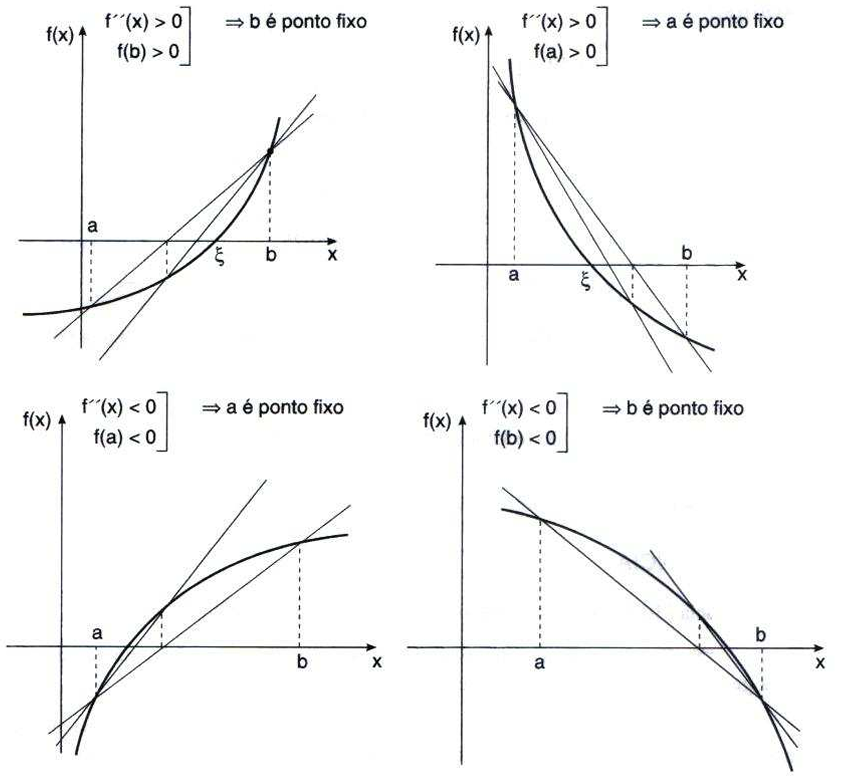

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/sample_data/posicao_falsa.png'))

# 2.2) Implementação
Faremos a execução seguindo estritamente a implementação do livro, com a adição de contadores de tempo exigidos no comando da questão.

In [ ]:
def metodo_posicao_falsa(f, a, b, epsilon):
  # 1. Dados iniciais

  inicio = time.perf_counter() # inicia marcador de tempo

  if b - a < epsilon:
    fim = time.perf_counter()
    return a, f(a), (b-a), 0, fim - inicio, 0
  elif abs(f(a)) < epsilon:
    fim = time.perf_counter()
    return a, f(a), (b-a), 0, fim - inicio, 0
  elif abs(f(b)) < epsilon:
    fim = time.perf_counter()
    return a, f(b), (b-a), 0, fim - inicio, 0
  # 2. teste das condições de parada para os dados iniciais

  k = 1
  # 3. inicia o contador de iterações

  M = f(a)
  # 4. avalia a função inicalmente em a

  while True:
    x = ((a * f(b)) - (b * f(a))) / (f(b) - f(a))
    # 5. valor da média ponderada no intervalo

    if abs(f(x)) < epsilon:
      fim = time.perf_counter()
      tempo_total = fim - inicio
      tempo_por_iteracao = tempo_total / k
      return x, f(x), (b-a), k, tempo_total, tempo_por_iteracao
      # 6. Testa se o x já corresponde a raiz

    if M * f(x) > 0:
      a = x
      # 7. Teste de sinal para substituir o limite de um dos intervalos

    else:
      b = x
      # 8. Substitui o b pelo x caso o teste de sinal seja negativo

    if b - a < epsilon:
      fim = time.perf_counter()
      tempo_total = fim - inicio
      tempo_por_iteracao = tempo_total / k
      return x, f(x), (b-a), k, tempo_total, tempo_por_iteracao
      # 9. Testa se o intervalo já é suficientemente pequeno

    k = k + 1
    # 10. Atualiza o contador de iterações

# 3) Método do Ponto Fixo
# 3.1) Explicação Teórica
O Método do Ponto Fixo (MPF) consiste em transformar a equação original $f(x) = 0$ em uma equação equivalente da forma $x = \varphi(x)$. A função $\varphi(x)$ é denominada função de iteração.A partir de uma aproximação inicial $x_0$, gera-se uma sequência de aproximações $\{x_k\}$ através da relação de recorrência:$$x_{k+1} = \varphi(x_k)$$A ideia central é que, se a sequência convergir, ela convergirá para um ponto $\xi$ tal que $\varphi(\xi) = \xi$, o que implica $f(\xi) = 0$. Ou seja, o problema de encontrar um zero de $f(x)$ é transformado no problema de encontrar um ponto fixo de $\varphi(x)$.
### Interpretação Geométrica
Geometricamente, a raiz da equação $x = \varphi(x)$ corresponde à abscissa do ponto de intersecção entre a reta $y = x$ e a curva $y = \varphi(x)$. O comportamento da convergência pode ser visualizado graficamente de duas formas principais, dependendo do sinal da derivada $\varphi'(x)$:
1. Convergência Monótona ("Escada"): Quando a derivada é positiva ($0 < \varphi'(x) < 1$), a aproximação caminha em degraus em direção à raiz.

2. Convergência Oscilante ("Espiral"): Quando a derivada é negativa ($-1 < \varphi'(x) < 0$), as aproximações alternam-se em torno da raiz, formando uma espiral convergente.



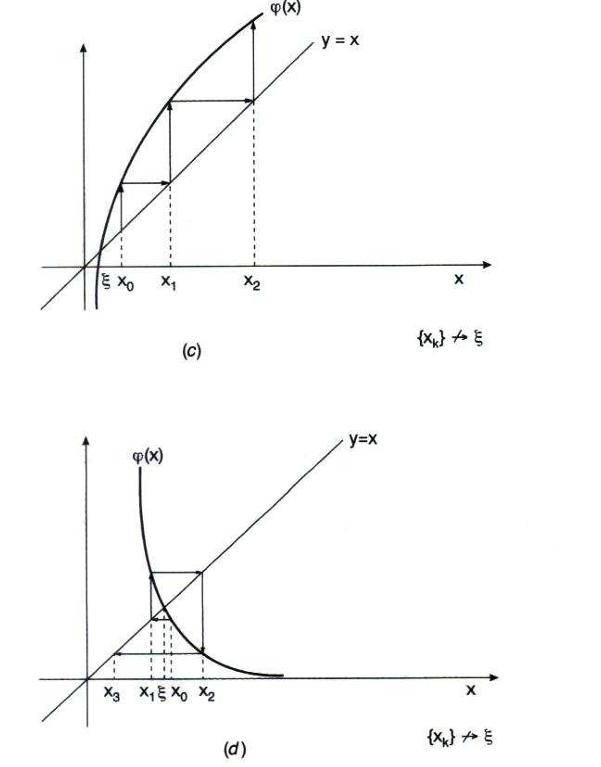

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/sample_data/mpf.png'))

###Teorema de Convergência
Nem toda função de iteração $\varphi(x)$ garante que o método funcione. O Teorema 2 estabelece condições suficientes para a convergência: Seja $\xi$ uma raiz isolada num intervalo $I$ centrado em $\xi$. A sequência converge se:

1. $\varphi(x)$ e $\varphi'(x)$ forem contínuas em $I$.
2. $|\varphi'(x)| \le M < 1$ para todo $x \in I$.
3. A aproximação inicial $x_0$ pertencer a $I$.

Essencialmente, a condição $|\varphi'(x)| < 1$ garante que a função $\varphi$ seja uma contração, diminuindo a distância entre a aproximação e a raiz a cada passo ($|x_{k+1} - \xi| < |x_k - \xi|$).

### Ordem de Convergência
A rapidez com que a sequência $\{x_k\}$ se aproxima da raiz $\xi$ é definida pela sua ordem de convergência. O Método do Ponto Fixo possui, em geral, convergência linear (ordem $p=1$).

A constante assintótica de erro é $C = |\varphi'(\xi)|$. Isso nos leva a uma conclusão prática de que quanto menor for o valor absoluto da derivada $|\varphi'(\xi)|$, mais rápida será a convergência do método.

###Critérios de Parada
O algoritmo utiliza dois critérios principais para interromper as iterações:
1. Erro absoluto entre iterações: $|x_k - x_{k-1}| < \epsilon$.
2. Valor da função: $|f(x_k)| < \epsilon$.

# 3.3 Implementação
Faremos a execução seguindo estritamente a implementação do livro, com a adição de contadores de tempo exigidos no comando da questão.

In [ ]:
def metodo_MPF(f, phi, x0, epsilon):
  #1. dados iniciais

  inicio = time.perf_counter() #inicia o medidor de tempo

  if abs(f(x0)) < epsilon:
    fim = time.perf_counter()
    return x0, f(x0), 0.0, 0, fim - inicio, 0
    # 2. testa se o f do chute inicial é suficientemente pequeno

  k = 1
  # 3. Inicia o contador de iterações

  while True:
    x1 = phi(x0)
    # 4. Avalia o phi em x0

    if (abs(f(x1)) < epsilon) or (abs(x1 - x0) < epsilon):
      fim = time.perf_counter()
      tempo_total = fim - inicio
      tempo_por_iteracao = tempo_total / k
      return x1, f(x1), abs(x1 - x0), k, tempo_total, tempo_por_iteracao
      # 5. Testa se f de x1 é suficientemente pequeno e se a distancia x1 - x0 é suficientemente pequena

    x0 = x1
    # 6. Atualiza o valor do x0, que será o novo chute

    k = k +1
    # 7. Atualiza a iteração

# 4) Método Newton
# 4.1) Explicação Teórica
O Método de Newton-Raphson é desenvolvido a partir da análise do Método do Ponto Fixo. Sabemos que a convergência do MPF é tanto mais rápida quanto menor for o valor absoluto da derivada da função de iteração, $|\varphi'(\xi)|$. O objetivo do Método de Newton é acelerar essa convergência escolhendo uma função de iteração $\varphi(x)$ tal que sua derivada na raiz seja nula, ou seja, $\varphi'(\xi) = 0$. A partir da forma geral $\varphi(x) = x + A(x)f(x)$, deduz-se matematicamente que para garantir $\varphi'(\xi) = 0$, deve-se tomar $A(x) = -\frac{1}{f'(x)}$. Isso resulta na fórmula recursiva do método:$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$$

### Interpretação Geométrica
Geometricamente, o método pode ser visualizado através da reta tangente. Dado um ponto $(x_k, f(x_k))$, traça-se a reta tangente à curva $f(x)$ neste ponto. A interseção desta reta com o eixo $x$ fornece a nova aproximação $x_{k+1}$. A equação da reta tangente $L_k(x)$ é dada por $L_k(x) = f(x_k) + f'(x_k)(x - x_k)$. Ao igualar essa reta a zero ($L_k(x) = 0$) para encontrar a intersecção, chega-se à mesma fórmula algébrica apresentada anteriormente.

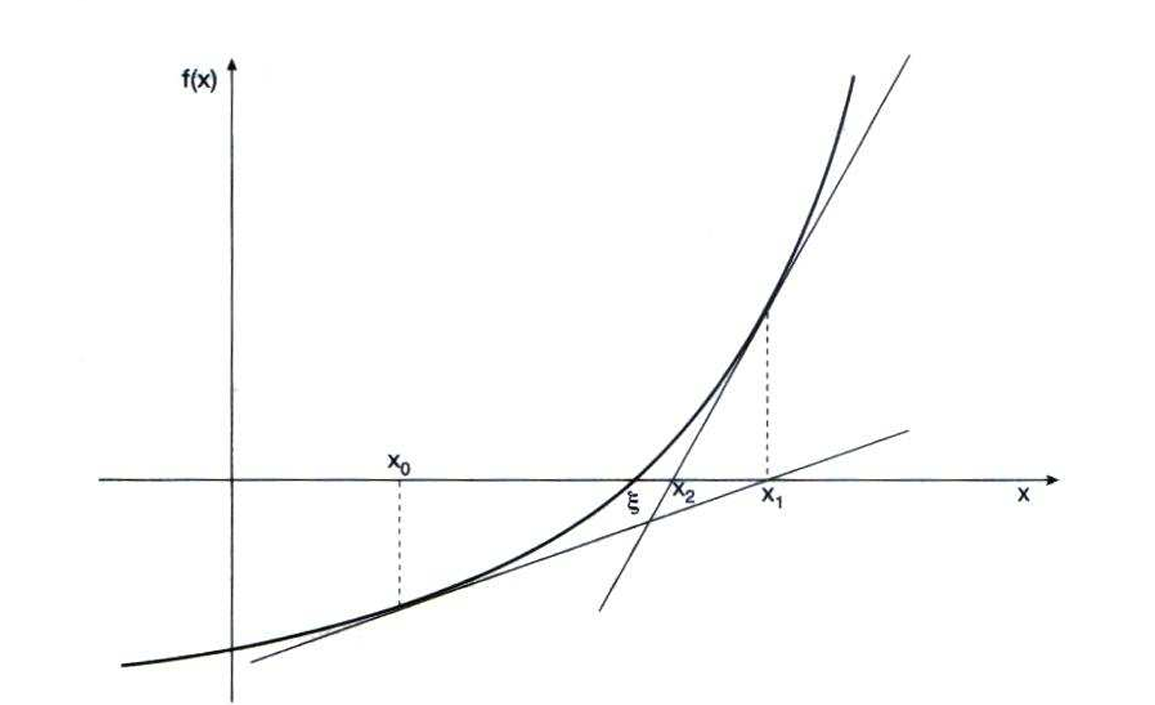

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/sample_data/newton.png'))

 ### Convergência e Critérios
 A convergência do Método de Newton é garantida pelo Teorema 3, desde que satisfeitas certas condições:
 1. As funções $f(x)$, $f'(x)$ e $f''(x)$ devem ser contínuas em um intervalo $I$ contendo a raiz.
 2. A derivada na raiz deve ser não-nula: $f'(\xi) \neq 0$.

 Se essas hipóteses forem verdadeiras, existe um intervalo próximo à raiz onde o método converge. Contudo, a escolha da aproximação inicial $x_0$ é crítica. Se $x_0$ for escolhido muito longe da raiz, ou em uma região onde a derivada é próxima de zero, o método pode divergir inicialmente.

 ### Ordem de Convergência
 A principal vantagem do Método de Newton é a sua velocidade. Ele possui convergência quadrática (ordem $p=2$). Isso significa que, assintoticamente, o erro em uma iteração é proporcional ao quadrado do erro da iteração anterior. Em termos práticos, a quantidade de dígitos decimais corretos aproximadamente duplica a cada iteração, à medida que se aproxima da raiz.

# 4.2 Implementação
Faremos a execução seguindo estritamente a implementação do livro, com a adição de contadores de tempo exigidos no comando da questão.

In [ ]:
def metodo_newton(f, df, x0, epsilon):
  # 1. Dados iniciais

  inicio = time.perf_counter() # Inicia contador de tempo

  if abs(f(x0)) < epsilon:
    fim = time.perf_counter()
    return x0, f(x0), 0.0, 0, fim - inicio, 0
    # 2. Testa se o f de x0 é suficientemente pequeno

  k = 1
  # 3. Inicializa o contador de iterações

  while True:
    x1 = x0 - (f(x0) / df(x0) )
    # 4.  aplica a formula

    if (abs(f(x1)) < epsilon) or abs(x1- x0) < epsilon:
      fim = time.perf_counter()
      tempo_total = fim - inicio
      tempo_por_iteracao = tempo_total / k
      return x1, f(x1), abs(x1 - x0), k, tempo_total, tempo_por_iteracao
      # 5. Checa de f de x1 é suficientemente pequeno ou se a diferença entre x1 e x0 é pequena o bastante

    x0 = x1
    # 6. Atualiza o valor do chute

    k = k + 1
    # 7. Atualiza a iteração


# 5) Método da Secante
# 5.1) Explicação Teórica
O Método da Secante surge como uma alternativa para contornar uma grande desvantagem do Método de Newton que é a necessidade de se obter a derivada $f'(x)$ e calcular seu valor numérico a cada iteração. Em muitos problemas práticos, calcular a derivada pode ser difícil ou computacionalmente custoso.  A solução proposta por este método é substituir a derivada exata $f'(x_k)$ por um quociente de diferenças aproximado, calculado a partir de duas aproximações anteriores, $x_k$ e $x_{k-1}$:$$f'(x_k) \approx \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}$$Substituindo essa aproximação na fórmula original de Newton, obtemos a função de iteração do Método da Secante:$$x_{k+1} = x_k - \frac{f(x_k)(x_k - x_{k-1})}{f(x_k) - f(x_{k-1})}$$Diferente do método de Newton, que exige apenas um ponto inicial, o Método da Secante exige duas aproximações iniciais ($x_0$ e $x_1$) para iniciar o processo.
### Interpretação Geométrica
Geometricamente, a partir de duas aproximações $x_{k-1}$ e $x_k$, a nova aproximação $x_{k+1}$ é obtida como sendo a abscissa do ponto de intersecção do eixo $x$ com a reta secante que passa pelos pontos $(x_{k-1}, f(x_{k-1}))$ e $(x_k, f(x_k))$.Isso difere do Método de Newton, que usa a reta tangente. Na figura abaixo, podemos ver como as secantes sucessivas cortam o eixo e se aproximam da raiz.

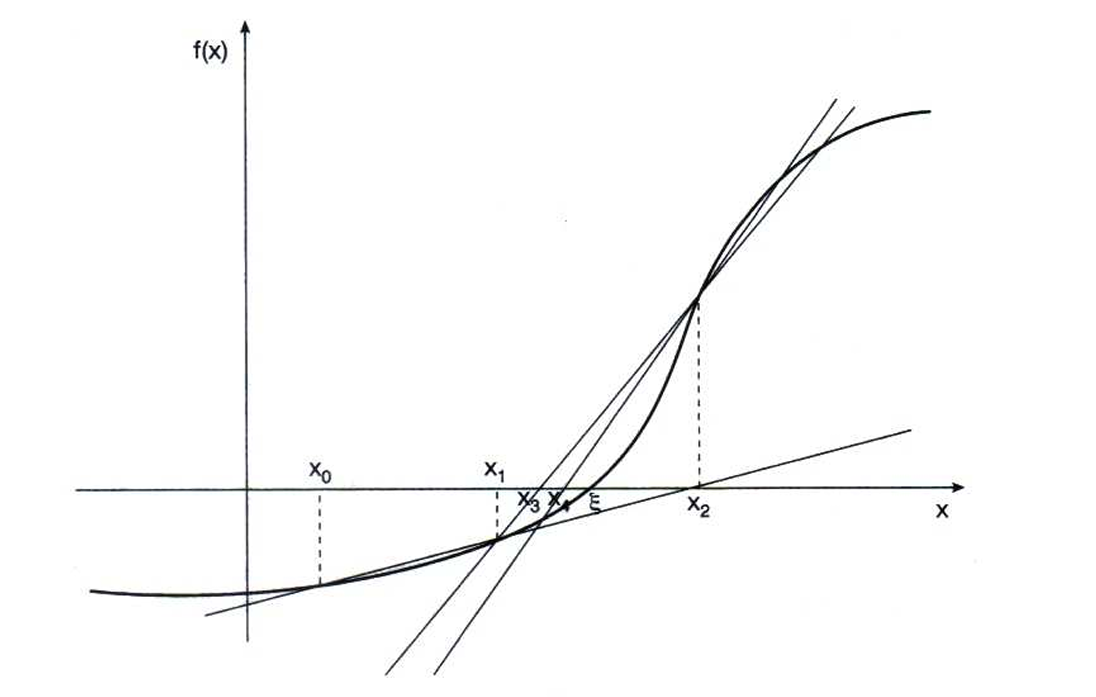

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/sample_data/secante.png'))

### Convergência
Como o Método da Secante é uma aproximação do Método de Newton, as condições para a convergência são praticamente as mesmas. Um ponto de atenção é que o método pode divergir se $f(x_k) \approx f(x_{k-1})$, pois isso causaria uma divisão por zero na fórmula.Em relação à velocidade, a ordem de convergência do Método da Secante não é quadrática ($p=2$) como a de Newton, mas também é superior à linear ($p=1$). Demonstra-se que a ordem de convergência é igual à "Proporção Áurea":$$p \approx 1.618$$Isso torna o método bastante eficiente, sem o custo de calcular derivadas.

#5.2) Implementação
Faremos a execução seguindo estritamente a implementação do livro, com a adição de contadores de tempo exigidos no comando da questão.

In [ ]:
def metodo_secante(f, x0, x1, epsilon):
  # 1. Dados iniciais

  inicio = time.perf_counter() # inicia o contador de tempo

  if abs(f(x0)) < epsilon:
    fim = time.perf_counter()
    return x0, f(x0), 0.0, 0, fim - inicio, 0
    # 2. Testa se o f de x0 já é suficientemente pequeno

  if (abs(f(x1)) < epsilon) or (abs(x1 - x0) < epsilon):
    fim = time.perf_counter()
    return x1, f(x1), 0.0, 0, fim - inicio, 0
    # 3. Testa se f de x1 e se a distancia entre x1 e x0 já são suficientemente pequenos

  k = 1
  # 4. Inicia contador de iterações

  while True:
    x2 = x1 - ((f(x1)/(f(x1)- f(x0))) * (x1 - x0))
    # 5. Aplica a formula

    if (abs(f(x2)) < epsilon) or (abs(x2-x1) < epsilon):
      fim = time.perf_counter()
      tempo_total = fim - inicio
      tempo_por_iteracao = tempo_total / k
      return x2, f(x2), abs(x2-x1), k, tempo_total, tempo_por_iteracao
      # 6. Teste se x2 ou a distancia de x2 e x1 são suficientemente pequenas

    x0 = x1
    x1 = x2
    # 7. Atualiza os valores para a proxima iteração

    k = k + 1
    # 8. Atualiza o contador de iterações

# 6) Exemplos com as tabelas
Código para a geração das tabelas

In [ ]:
import pandas as pd

def gerar_tabela_comparativa(lista_resultados):

    # Cria o DataFrame
    df = pd.DataFrame(lista_resultados)

    colunas_ordem = ['Metodo', 'Dados Iniciais', 'Raiz (x_barra)', 'f(x_barra)', 'Erro em x', 'Iterações', 'Tempo Total (s)', 'Tempo por Iteração']

    df = df[colunas_ordem]

    # Transpõe a tabela para ajuste
    df_transposta = df.set_index('Metodo').T

    return df_transposta



Código para criação de dicionários com os resultados

In [ ]:
def criar_dicionario(nome_metodo, dados_iniciais_str, tupla_resultados):

    raiz, residuo, erro, k, t_total, t_medio = tupla_resultados

    # 2. Monta o dicionário com as chaves exatas que a tabela espera
    return {
        'Metodo': nome_metodo,
        'Dados Iniciais': dados_iniciais_str,
        'Raiz (x_barra)': raiz,
        'f(x_barra)': residuo,
        'Erro em x': erro,
        'Iterações': k,
        'Tempo Total (s)': t_total,
        'Tempo por Iteração': t_medio
    }

Função para comparar os métodos

In [ ]:
def comparar_metodos(f, funcao_phi, derivada, a, b, x0_newton, x0_mpf,x0_secante, x1_secante, epsilon):
  lista_resultados = []

  #bisseção
  resultados_bissecao = metodo_bissecao(f, a, b, epsilon)
  dict_bissecao = criar_dicionario("Bisseção", f"[{a}, {b}]", resultados_bissecao)
  lista_resultados.append(dict_bissecao)

  # posição falsa
  resultados_posicao_falsa = metodo_posicao_falsa(f, a, b, epsilon)
  dict_posicao_falsa = criar_dicionario("Posição Falsa", f"[{a}, {b}]", resultados_posicao_falsa)
  lista_resultados.append(dict_posicao_falsa)

# MPF
  resultados_MPF = metodo_MPF(f, funcao_phi, x0_mpf, epsilon)
  dict_MPF = criar_dicionario("MPF", f"x0 = {x0_mpf}", resultados_MPF)
  lista_resultados.append(dict_MPF)

# Newton
  resultados_newton = metodo_newton(f, derivada, x0_newton, epsilon)
  dict_newton = criar_dicionario("Newton", f" x0 = {x0_newton}", resultados_newton)
  lista_resultados.append(dict_newton)

# Secante
  resultados_secante = metodo_secante(f, x0_secante, x1_secante, epsilon)
  dict_secante = criar_dicionario("Secante", f"x0 = {x0_secante}; x1 = {x1_secante}", resultados_secante)
  lista_resultados.append(dict_secante)

  tabela_exemplo = gerar_tabela_comparativa(lista_resultados)

  display(tabela_exemplo)

# exemplo 18

In [ ]:
# dados do exemplo 18
a = 1
b = 2
epsilon = 10 ** (-2)
x0_mpf = 1.5
x0_newton = 1.5
x0_secante = 1
x1_secante = 2

def funcao_exemplo18(x):
  return math.exp(-(x**2)) - math.cos(x)

def phi_exemplo18(x):
  return math.cos(x) - (math.exp(-x ** 2)) + x

def derivada_f_exemplo18(x):
  return -2 * x * math.exp(-x**2) + math.sin(x)

comparar_metodos(funcao_exemplo18, phi_exemplo18, derivada_f_exemplo18, a, b, x0_newton, x0_mpf, x0_secante, x1_secante, epsilon)



Metodo,Bisseção,Posição Falsa,MPF,Newton,Secante
Dados Iniciais,"[1, 2]","[1, 2]",x0 = 1.5,x0 = 1.5,x0 = 1; x1 = 2
Raiz (x_barra),1.4453125,1.4393199,1.45379199,1.4491235,1.45366104
f(x_barra),-0.00133499864,-0.0051191846,0.00407547207,0.00108862303,0.00399142769
Erro em x,0.0078125,0.592450809,0.0115459899,0.0508765002,0.0461118517
Iterações,7,3,2,1,3
Tempo Total (s),2.98660007e-05,1.50169999e-05,5.34299943e-06,1.1698e-05,1.06090001e-05
Tempo por Iteração,4.26657152e-06,5.00566663e-06,2.67149971e-06,1.1698e-05,3.53633338e-06


# Exemplo 19

In [ ]:
# dados do exemplo 19
a = 1
b = 2
epsilon = 10 ** (-6)
x0_mpf = 1
x0_newton = 0
x0_secante = 0
x1_secante = 0.5

def funcao_exemplo19(x):
  return (x ** 3) - (x) - (1)

def derivada_f_exemplo19(x):
  return 3 * (x ** 2) - 1

def phi_exemplo19(x):
  return (x + 1) ** (1/3)

comparar_metodos(funcao_exemplo19,
                 phi_exemplo19,
                 derivada_f_exemplo19,
                 a,
                 b,
                 x0_newton,
                 x0_mpf,
                 x0_secante,
                 x1_secante,
                 epsilon)

Metodo,Bisseção,Posição Falsa,MPF,Newton,Secante
Dados Iniciais,"[1, 2]","[1, 2]",x0 = 1,x0 = 0,x0 = 0; x1 = 0.5
Raiz (x_barra),1.32471752,1.32471776,1.32471785,1.32471796,1.32471795
f(x_barra),-1.85757643e-06,-8.2906613e-07,-4.73726474e-07,2.74713585e-12,-4.34057552e-08
Erro em x,9.53674316e-07,0.675282501,4.73726475e-07,8.31369867e-07,1.19166137e-05
Iterações,20,17,9,21,26
Tempo Total (s),1.93870001e-05,4.0461e-05,1.00180005e-05,2.65039998e-05,5.69989998e-05
Tempo por Iteração,9.69350003e-07,2.38005883e-06,1.11311116e-06,1.26209523e-06,2.19226922e-06


# Exemplo 20

In [ ]:
# dados iniciais do exemplo 20


a = 0
b = 1
epsilon = 10 ** (-5)
x0_mpf = 0.5
x0_newton = 0.5
x0_secante = 0
x1_secante = 1

def funcao_exemplo20(x):
  return 4 * (math.sin(x)) - math.exp(x)

def derivada_f_exemplo20(x):
  return 4 * math.cos(x) - math.exp(x)

def phi_exemplo20(x):
  return x - (2 * (math.sin(x))) + (0.5 * (math.exp(x)))

comparar_metodos(funcao_exemplo20,
                 phi_exemplo20,
                 derivada_f_exemplo20,
                 a,
                 b,
                 x0_newton,
                 x0_mpf,
                 x0_secante,
                 x1_secante,
                 epsilon)


Metodo,Bisseção,Posição Falsa,MPF,Newton,Secante
Dados Iniciais,"[0, 1]","[0, 1]",x0 = 0.5,x0 = 0.5,x0 = 0; x1 = 1
Raiz (x_barra),0.370552063,0.370558828,0.370556114,0.370558084,0.370558098
f(x_barra),-1.37550016e-05,1.66980633e-06,-4.51936095e-06,-2.78349572e-08,5.26049049e-09
Erro em x,7.62939453e-06,0.370562817,1.6143972e-05,0.000138632636,5.7406394e-06
Iterações,17,8,5,3,7
Tempo Total (s),1.83829998e-05,1.60270001e-05,6.02399996e-06,5.62599962e-06,9.73900023e-06
Tempo por Iteração,1.08135293e-06,2.00337502e-06,1.20479999e-06,1.87533321e-06,1.39128575e-06


# Exemplo 21

In [ ]:
# dados iniciais do exemplo 21


a = 2
b = 3
epsilon = 10 ** (-7)
x0_mpf = 2.5
x0_newton = 2.5
x0_secante = 2.3
x1_secante = 2.7

def funcao_exemplo21(x):
  return x * math.log10(x) - 1

def derivada_f_exemplo21(x):
  return math.log10(x) + (1 / math.log(10))

def phi_exemplo21(x):
  return x - (1.3 *(x * math.log10(x) - 1))

comparar_metodos(funcao_exemplo21,
                 phi_exemplo21,
                 derivada_f_exemplo21,
                 a,
                 b,
                 x0_newton,
                 x0_mpf,
                 x0_secante,
                 x1_secante,
                 epsilon)

Metodo,Bisseção,Posição Falsa,MPF,Newton,Secante
Dados Iniciais,"[2, 3]","[2, 3]",x0 = 2.5,x0 = 2.5,x0 = 2.3; x1 = 2.7
Raiz (x_barra),2.50618416,2.50618403,2.50618417,2.50618415,2.50618418
f(x_barra),1.26001187e-08,-9.92799188e-08,2.05082658e-08,1.37823086e-12,2.91525715e-08
Erro em x,5.96046448e-08,0.493818442,3.20058243e-07,3.98813658e-06,8.05609321e-05
Iterações,24,5,5,2,3
Tempo Total (s),1.68509996e-05,1.04310002e-05,5.06499964e-06,5.1879997e-06,5.17499939e-06
Tempo por Iteração,7.02124983e-07,2.08620004e-06,1.01299993e-06,2.59399985e-06,1.7249998e-06


#Exemplo 22
Vamos comparar o método de Newton com diferentes chutes iniciais

In [ ]:
# Dados iniciais do exemplo 22
def f_ex22(x):
    return x**3 - 3.5*(x**2) + 4*x - 1.5

def df_ex22(x):
    return 3*(x**2) - 7*x + 4

epsilon = 5e-8

# execucção dos testes
testes = [
    {"Label": "Teste 1", "x0": 0.5},
    {"Label": "Teste 2", "x0": 1.33333},
    {"Label": "Teste 3", "x0": 1.33334}
]

tabela_resultados = {}

for t in testes:
    x0_inicial = t["x0"]

    x, fx, erro, k, tempo, tempo_interacao = metodo_newton(f_ex22, df_ex22, x0_inicial, epsilon)

    tabela_resultados[t["Label"]] = {
      "x₀": x0_inicial,
      "x̄": x,
      "f(x̄)": fx,
      "erro em x": erro,
      "n₀ de iterações": k,
      "Tempo Total (s)": tempo,
      "Tempo/Iter (s)": tempo_interacao
    }


df_ex22 = pd.DataFrame(tabela_resultados)
pd.options.display.float_format = '{:.9g}'.format
display(df_ex22)

,Teste 1,Teste 2,Teste 3
x₀,0.5,1.33333,1.33334
x̄,0.999776466,0.999709005,1.5
f(x̄),-2.4994935e-08,-4.23636326e-08,1.22412569e-09
erro em x,0.00022333476,0.000290657089,3.49863126e-05
n₀ de iterações,12,35,27
Tempo Total (s),3.66820004e-05,6.01619995e-05,3.72180002e-05
Tempo/Iter (s),3.05683337e-06,1.71891427e-06,1.37844445e-06


#7) Comparação entre os métodos
Com base nos resultados obtidos nas tabelas dos exemplos anteriores e na teoria dos métodos numéricos, apresentamos a análise detalhada considerando o tempo de processamento e o esforço computacional.

# 7.1 ) Análise de Tempo (Total e Por Iteração)
O tempo de execução é um reflexo direto da complexidade aritmética e da velocidade de convergência de cada método.
1. Método da Bissecção:
* **Tempo Total:** Geralmente o maior entre os métodos. A convergência linear é lenta, exigindo muitas iterações para atingir a precisão $\epsilon$.
* **Tempo por Iteração:** As operações matemáticas são triviais, o que torna cada passo individualmente rápido, apesar da quantidade total ser grande.

2. Método da Posição Falsa:
* **Tempo Total:** Converge mais rápido que a bissecção em muitos casos, mas pode degradar se a função for muito curva em uma das extremidades do intervalo.
* **Tempo por Iteração:** similar à bissecção, mas com uma fórmula de média ponderada..

3. Método do Ponto Fixo (MPF):
* **Tempo Total:** Variável. Depende inteiramente da escolha da função de iteração $\varphi(x)$. Se $| \varphi'(x) |$ for próximo de 0, é rápido, se for próximo de 1, é lento.
* **Tempo por Iteração:** apenas uma avaliação da função $\varphi$.

4. Método de Newton-Raphson:
* **Tempo Total:** Geralmente o menor para raízes simples. A convergência quadrática reduz drasticamente o número total de iterações.
* **Tempo por Iteração:** É o método mais caro por passo, pois exige calcular duas funções complexas a cada ciclo, $f(x)$ e $f'(x)$, além de uma divisão.

5. Método da Secante:
* **Tempo Total:** Muitas vezes superando o Newton em tempo real. Embora precise de algumas iterações a mais que o Newton, ele evita o custo de processamento da derivada.
* **Tempo por Iteração:** Realiza apenas 1 avaliação de função por passo.

## 6.2. Análise do Esforço Computacional

Avaliamos o esforço computacional dos métodos implementados seguindo os critérios estabelecidos no roteiro da atividade:

### A. Número de Avaliações de Função por Iteração
Este é frequentemente o fator dominante no custo computacional em problemas reais de engenharia, onde calcular $f(x)$ pode ser custoso.

* **Newton:** **2 avaliações** por passo ($f(x_k)$ e $f'(x_k)$). É o mais custoso individualmente.
* **Secante, Bisseção, Posição Falsa e MPF:** **1 avaliação** por passo (pois reaproveitam os dados da iteração anterior).

### B. Complexidade das Operações Aritméticas
* **Newton e Secante**. Envolvem divisões e subtrações de termos que podem ser algebricamente complexos.
* **Posição Falsa**. Envolve o cálculo de média ponderada.
* **Bisseção**. Envolve apenas operações triviais de soma e divisão por 2.

### C. Número de Decisões Lógicas
* **Bisseção e Posição Falsa:** Estes métodos dependem pesadamente da lógica condicional como `if f(a)*f(x) < 0`. Isso adiciona um custo de "desvio" no processador a cada iteração para decidir qual subintervalo manter.
* **Newton e MPF:** A lógica é direta e sequencial, apenas aplicando a fórmula até atingir o critério de parada.

### D. Número Total de Iterações

* **Newton:** Convergência Quadrática $p=2$. É o campeão em eficiência de passos, exceto em casos patológicos como raízes múltiplas.
* **Secante:** Convergência Superlinear $p \approx 1.618$.
* **MPF, Bisseção e Posição Falsa:** Convergência Linear ($p=1$). A Bissecção é a mais lenta, reduzindo o erro apenas pela metade a cada passo.

### Conclusão Comparativa
O Método de Newton é o mais indicado quando se conhece a derivada analítica e o chute inicial é próximo, pois minimiza o tempo total devido às poucas iterações. O Método da Secante oferece o melhor custo benefício entre complexidade e precisão pois não exige derivada. A Bisseção e Posição Falsa, apesar do alto número de iterações, é a única que garante certeza de convergência em todos os casos.

# Questão B)